In [1]:
import numpy as np
import matplotlib.pyplot as plt


from multidimga import MultiDimGA
from numba import jit
# %matplotlib

In [2]:
"""
|x1| + sin(x2) = 0.5
x1^2 + x2^2 = 1
"""

@jit
def f1(x, y):
    return np.abs(x) + np.sin(y) - 0.5

@jit
def f2(x, yy):
    return x**2 + y**2 - 1

@jit
def f(x, y):
    return np.abs(np.abs(x) + np.sin(y) - 0.5) + np.abs(x**2 + y**2 - 1)


intervals = np.array([
    [-2, 2], 
    [-1, 1]
])

In [3]:
x = np.linspace(intervals[0][0], intervals[0][1], 100)
y = np.linspace(intervals[1][0], intervals[1][1], 100)

xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)
zz1 = f1(xx, yy)
zz2 = f2(xx, yy)

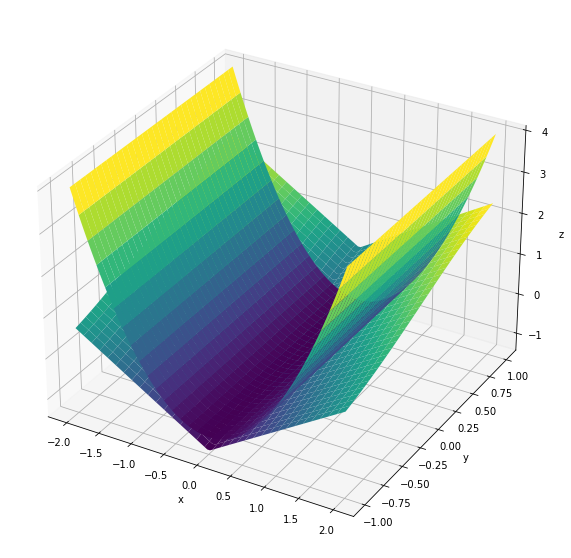

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection = '3d')

ax.plot_surface(xx, yy, zz1, cmap="viridis", rstride=3, cstride=3)
ax.plot_surface(xx, yy, zz2, cmap="viridis", rstride=3, cstride=3)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

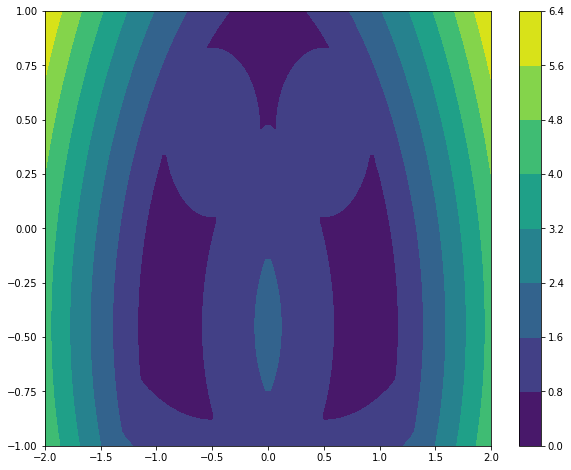

In [5]:
fig = plt.figure(figsize=(10,8))
fig.add_subplot(1, 1, 1)
plt.contourf(xx, yy, zz)
plt.colorbar()

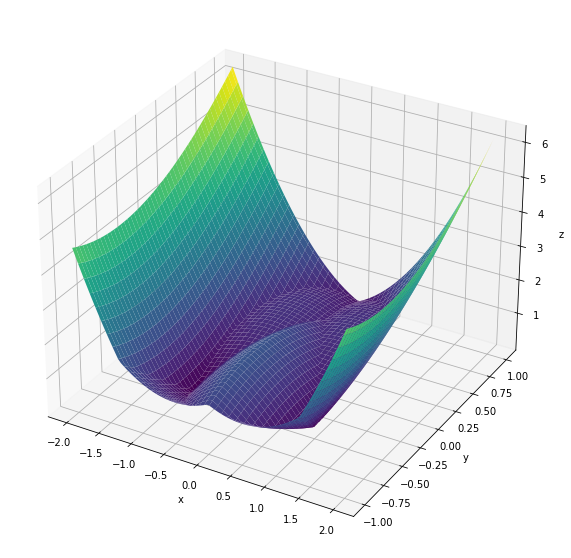

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.plot_surface(xx, yy, zz, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [ ]:
h = 1e-8
n = 500
tournament_n=3
mutation_p=0.1
crossover_p=0.95
max_iter = 50
max_no_conv_iter = 40
min_lifetime=5
max_lifetime=10
reproduction_p=0.15

In [70]:
h = 1e-6
n = 500
tournament_n=3
mutation_p=0.1
crossover_p=0.95
max_iter = 100
max_no_conv_iter = 20
min_lifetime=5
max_lifetime=10
reproduction_p=0.25

multi_dim_ga = MultiDimGA()
x, y = multi_dim_ga.solve(f,
                         intervals=intervals, 
                         h=h, 
                         n=n,
                         tournament_n=tournament_n,
                         mutation_p=mutation_p,
                         crossover_p=crossover_p,
                         max_iter=max_iter,
                         max_no_conv_iter=max_no_conv_iter,
                         min_lifetime=min_lifetime,
                         max_lifetime=max_lifetime,
                         reproduction_p=reproduction_p,
                         max_problem=False,
                         verbose=False)

print(f"x1: {x[0]}\nx2: {x[1]}\ny:  {y}")

IntProgress(value=0)

x1: 0.9084431906803108
x2: -0.4179684724657404
y:  0.0025718684341401454


In [47]:
# print(f"x1: {x[0]}\nx2: {x[1]}\ny:  {y}")

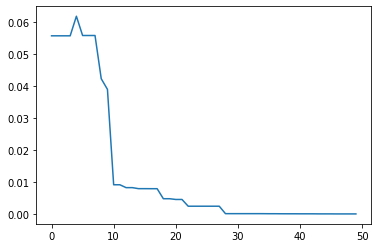

In [65]:
plt.plot(multi_dim_ga.history)
plt.show()

IntProgress(value=0, max=200)

IntProgress(value=0, max=200)

IntProgress(value=0, max=200)

IntProgress(value=0, max=200)

KeyboardInterrupt: 

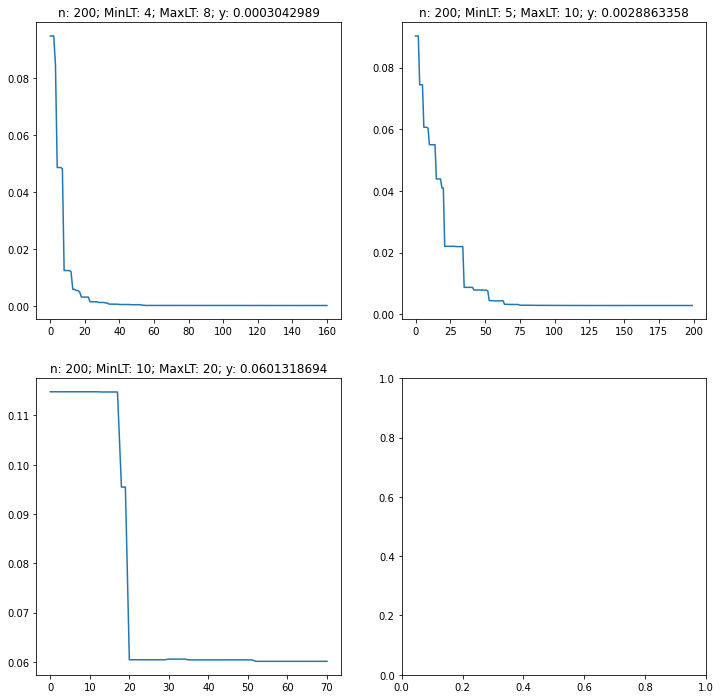

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
axs_ = axs.ravel()

args = {
  "n":              [500, 500,  500,  500    ],
  "min_lifetime":   [4,    5,    10,   20,   ],
  "max_lifetime":   [8,    10,   20,   40,   ],
  "reproduction_p": [0.34, 0.3, 0.11, 0.06, ]
}


for i in range(len(args["reproduction_p"])):
  x, y = multi_dim_ga.solve(f,
                         intervals=intervals, 
                         h=h, 
                         n=args["n"][i],
                         tournament_n=tournament_n,
                         mutation_p=mutation_p,
                         crossover_p=crossover_p,
                         max_iter=max_iter,
                         max_no_conv_iter=max_no_conv_iter,
                         min_lifetime=args["min_lifetime"][i],
                         max_lifetime=args["max_lifetime"][i],
                         reproduction_p=args["reproduction_p"][i],
                         max_problem=False)
 
  axs_[i].plot(multi_dim_ga.history)
  axs_[i].title.set_text(f'n: {args["n"][i]}; MinLT: {args["min_lifetime"][i]}; MaxLT: {args["max_lifetime"][i]}; y: {np.round(y, 10)}')


In [ ]:
# fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(1, 1, 1)
# ax.plot(x[0], x[1], "or")
# plt.contourf(xx, yy, zz)
# plt.colorbar()